In [1]:
import pandas as pd, numpy as np, tensorflow as tf

In [6]:
def mean_absolute_percentage_error(y_true, y_pred):
    return tf.reduce_mean(tf.abs((y_true-y_pred) / y_true)) * 100.0

In [3]:
#df = pd.read_feather('E:/Skóli/HÍ/Vélaverkfræði Master HÍ/Lokaverkefni/Data/merged-w-landscape-full-25ms-24hr-28-2-24.feather')
df = pd.read_feather('D:\Skóli\lokaverkefni_vel\data\merged-full-W-Landscape-And-Station-Elevations-25ms-24hr-11-3-24.feather')
df = df[df.f < df.fg]
df['gust_factor'] = df.fg / df.f

guess = df.gust_factor.mean()

In [4]:
df

,X,Y,time,ws_15,ws_250,ws_500,wd_15,wd_250,wd_500,p_15,...,longitude,latitude,Ri_01,Ri_12,N_01,N_12,station_elevation,landscape_points,elevations,gust_factor
0,419760.4353,311410.4631,2020-02-14T09:40:00,19.6041,23.1354,23.5411,97.9485,99.3434,99.9549,98956.6580,...,-20.5995,63.2993,-0.593939,-1.137324,-0.000134,-0.000003,33.438521,"[[420112.93989447743, 311361.54904540273], [42...","[779.7168035654618, 782.0526596557524, 786.179...",1.295181
1,419760.4353,311410.4631,2019-02-20T01:00:00,14.4611,16.8599,17.1642,145.3825,146.3173,146.5913,100351.7109,...,-20.5995,63.2993,-0.422328,-1.799695,-0.000044,-0.000003,33.438521,"[[420112.4996219488, 311358.474764043], [42011...","[777.3745944169202, 782.0397823265109, 786.175...",1.284157
2,419760.4353,311410.4631,2019-02-17T00:40:00,8.5471,9.1812,9.1686,62.6103,65.3626,79.3139,100649.9705,...,-20.5995,63.2993,-1.177507,26685.778689,-0.000009,0.000068,33.438521,"[[420116.31686465454, 311409.84196886426], [42...","[784.1650077215852, 788.0848430684046, 790.183...",1.283989
3,419760.4353,311410.4631,2019-02-05T23:40:00,10.3157,11.1665,11.1894,88.1111,89.3584,90.2917,101001.3064,...,-20.5995,63.2993,-2.864259,233.822195,-0.000038,0.000002,33.438521,"[[420114.5577725153, 311375.11697822495], [420...","[779.7686245550574, 784.150857915831, 786.2225...",1.317876
4,419760.4353,311410.4631,2018-12-17T19:30:00,11.2918,17.3783,17.6068,116.0218,129.5856,136.2121,99682.9219,...,-20.5995,63.2993,0.412797,245.814617,0.000277,0.000205,33.438521,"[[420116.29789345217, 311406.73637940787], [42...","[784.1530257740433, 786.2250760674577, 790.170...",1.354316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18428,543704.3472,672486.1026,2014-12-10T12:40:00,10.6554,11.5584,11.0643,6.4581,8.6411,12.4018,96755.1484,...,-18.0167,66.5438,-7.538465,4.194781,-0.000111,0.000016,19.654911,"[[543906.9435960962, 672778.6889533278], [5438...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.302309
18429,543704.3472,672486.1026,2015-12-08T05:00:00,25.4698,31.2753,33.5225,97.3362,98.8644,101.6907,99002.3281,...,-18.0167,66.5438,-0.042580,1.078334,-0.000026,0.000087,19.654911,"[[544054.4942800443, 672422.4700910029], [5440...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.228657
18430,543704.3472,672486.1026,2019-12-11T08:10:00,19.3720,22.8016,23.2493,41.1882,44.0706,46.2614,95774.5937,...,-18.0167,66.5438,-0.110178,12.661773,-0.000023,0.000041,19.654911,"[[543800.6490567861, 672828.7073668151], [5437...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.283449
18431,543704.3472,672486.1026,2020-02-14T14:10:00,23.5278,28.6951,29.9320,93.5311,95.0293,96.2047,97827.6385,...,-18.0167,66.5438,-0.264139,1.104732,-0.000128,0.000027,19.654911,"[[544055.1414271548, 672426.1402446448], [5440...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.363419


In [7]:
mape = mean_absolute_percentage_error(df.gust_factor, guess)

print(f'Mape: {mape}%')

Mape: 10.314537089768933%


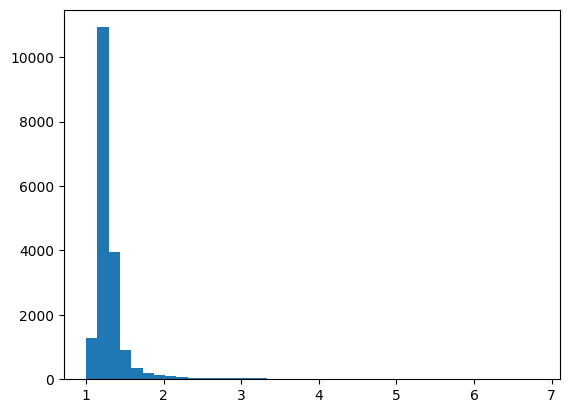

In [11]:
from matplotlib import pyplot as plt

plt.hist(df.gust_factor, bins=40)
plt.show()

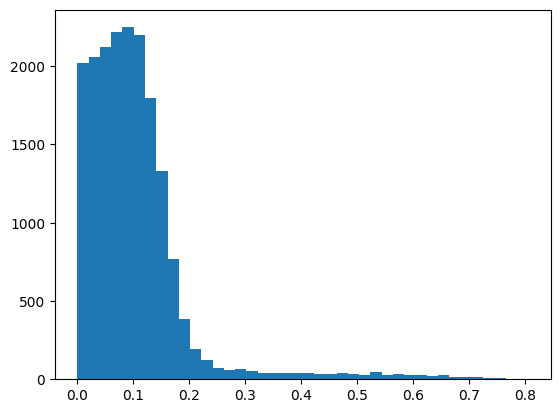

In [14]:
plt.hist(abs((df.gust_factor - guess)/df.gust_factor), bins=40)
plt.show()

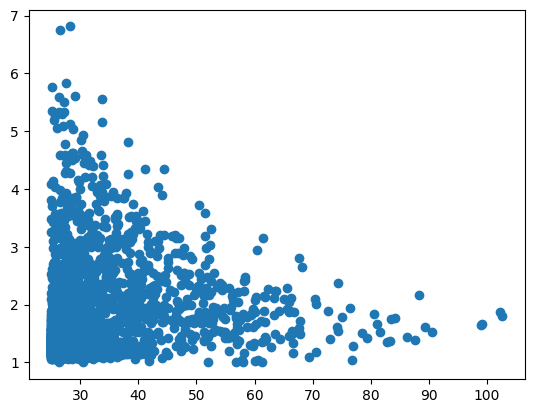

In [16]:
plt.scatter(df.f, df.gust_factor)
plt.show()

In [17]:
max(df.f)

102.6

In [18]:
max(df.gust_factor)

6.811594202898551